In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/ciqual_small.csv")

# 04 - Cost Function

## Multiple Samples

When applied to multiple data samples, we usually call *cost function* the function calculating the error of prediction.

You will adapt the loss function from 3. to create the MSE cost function. This function will calculate the total error.

In [3]:
# Your code here


In [4]:
# Take h() from Exercise 02
def h(x, theta0, theta1):
    y_pred = theta0 + theta1 * x
    return y_pred

# Take initialization from Exercise 03
np.random.seed(123)
theta0 = np.random.rand()
theta1 = np.random.rand()
print(theta0, theta1)
# you should get: 0.6964691855978616 0.28613933495037946

0.6964691855978616 0.28613933495037946


In [5]:
def L(x, y, theta0, theta1):
    y_hat = h(x, theta0, theta1)
    return np.sum((y_hat - y) ** 2)

Using the whole dataset and the random initialized parameters you should get:

In [6]:
L(x=data['Zinc (mg/100g)'], y=data['Phosphorus (mg/100g)'], theta0=theta0, theta1=theta1)
# Should return 2789086.39259691

2789086.39259691

## Grid Search to Find Parameters

The last part of the linear regression algorithm is the optimization of our parameters $\theta_0$ and $\theta_1$. But first, we will look at a range of parameter values to the see the impact on the cost. You will do a grid search of parameters $\theta_0$ and $\theta_1$.

- 1. Use your function from 4. to calculate the cost on the whole dataset using different values of $\theta_0$ and $\theta_1$.

Use the following grid of parameters:

In [7]:
theta0_grid = np.arange(-500, 500, 50)
theta1_grid = np.arange(-500, 500, 50)

Your function must take your variables `x`, `y`, `theta0_grid`, and `theta1_grid` as input and return a two-dimensional Numpy array containing the cost values corresponding to each combination of parameter $\theta_0$ and $\theta_1$.

- 2. Store these value in a 2D Numpy array

<details>
<summary>hint</summary>
You can create an array filled with 0. For instance,

```python
np.zeros((2, 2))
```

creates an array of shape $2 \times 2$. You can then fill it with the parameter values.
</details>

In [8]:
# Your code here
def grid_search(x, y, theta0_grid, theta1_grid):
    pass

In [9]:
theta0_grid = np.arange(-500, 500, 50)
theta1_grid = np.arange(-500, 500, 50)

def grid_search(x, y, theta0_grid, theta1_grid):
    cost_all = np.zeros((theta0_grid.shape[0], theta1_grid.shape[0]))

    for i in range(theta0_grid.shape[0]):
        for j in range(theta1_grid.shape[0]):
            cost = L(x, y, theta0=theta0_grid[i], theta1=theta1_grid[j])
            cost_all[i, j] = cost
    return cost_all

In [10]:
cost_all = grid_search(x=data['Zinc (mg/100g)'], y=data['Phosphorus (mg/100g)'],
                       theta0_grid=theta0_grid, theta1_grid=theta1_grid)

You can check your `grid_search()` function with the following test:

In [11]:
cost_all = grid_search(x=data['Zinc (mg/100g)'], y=data['Phosphorus (mg/100g)'],
                       theta0_grid=theta0_grid, theta1_grid=theta1_grid)
cost_all[12, 4]
# Should return 27525475.0

27525475.0

In [12]:
cost_all[7, 18]
# Should return 10732372.0

10732372.0

- 3. Plot this matrix using a heatmap

<details>
<summary>hint</summary>
https://seaborn.pydata.org/generated/seaborn.heatmap.html
</details>


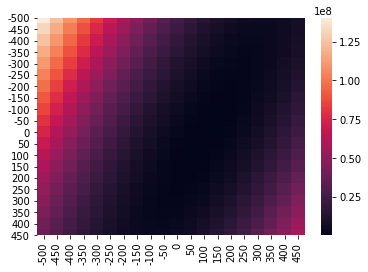

In [13]:
sns.heatmap(cost_all,
           xticklabels = theta1_grid,
           yticklabels = theta0_grid)

There is an issue: since the parameters don't have the same scale, the "good" parameter values (the values that are associated with a low cost) are more spread on one dimension in comparison to the other. It is hard to visualize and to find the good parameters. We will also see later that it is not good for gradient descent to have features scaled differently.

In our case, there is only one feature, we want to normalize it. We also want to normalize the dependent variable in order to insure that the bset parameters will be in the same range which will facilitate the search.

Thus, your next task is to normalize the feature (amount of `zinc`) and the dependent variable (amount of `phosphorus`). To do so, you will create a normalization function.

In [14]:
# Your code here


In [15]:
def normalize(X):
    return (X - X.mean()) / X.std()

We will copy our dataset to be sure to keep it untouched and normalize the variables on the copy.

In [16]:
data_norm = data.copy()

To check that your function is correct, run the following test:

In [17]:
normalize(data_norm['Zinc (mg/100g)']).head()
# Should return the following values:
# 0    -1.033903
# 1    -1.299774
# 2    -0.905552
# 3    -1.235598
# 4    -1.382285

0   -1.033903
1   -1.299774
2   -0.905552
3   -1.235598
4   -1.382285
Name: Zinc (mg/100g), dtype: float64

When your `normalize()` function is correct:

- 1. Use it to normalize the variables `zinc` and `phosphorus`.
- 2. Visualize the scatter plot of the normalized data.
- 3. Calculate the cost for every combination of parameter with the function `grid_search()` that you coded above.
- 4. Visualize the new heatmap from normalized data.

In [18]:
# Your code here


1.

In [19]:
data_norm['Zinc (mg/100g)'] = normalize(data_norm['Zinc (mg/100g)'])
data_norm['Phosphorus (mg/100g)'] = normalize(data_norm['Phosphorus (mg/100g)'])

2.

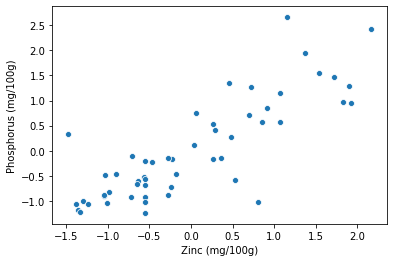

In [20]:
sns.scatterplot('Zinc (mg/100g)','Phosphorus (mg/100g)', data=data_norm)

We can see that the normalized data are centered around 0.

3.

In [21]:
cost_all_norm = grid_search(x=data_norm['Zinc (mg/100g)'], y=data_norm['Phosphorus (mg/100g)'],
                            theta0_grid=theta0_grid, theta1_grid=theta1_grid)


4.

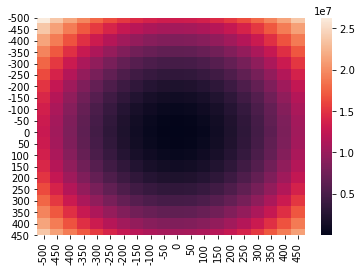

In [22]:
sns.heatmap(cost_all_norm,
           xticklabels = theta1_grid,
           yticklabels = theta0_grid)

Let's zoom in a bit. You can repeat the same steps using a new range for our grid:

In [23]:
theta0_grid = np.arange(-2, 2, 0.2)
theta1_grid = np.arange(-2, 2, 0.2)

In [24]:
# Your code here


In [25]:
cost_all_norm = grid_search(x=data_norm['Zinc (mg/100g)'], y=data_norm['Phosphorus (mg/100g)'],
                            theta0_grid=theta0_grid, theta1_grid=theta1_grid)

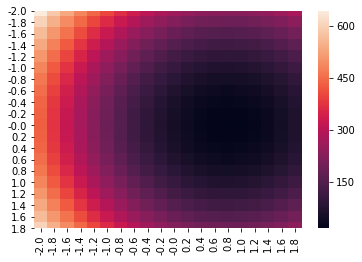

In [26]:
sns.heatmap(cost_all_norm,
           xticklabels = theta1_grid.round(2),
           yticklabels = theta0_grid.round(2))


The last thing to do it to extract the parameters associated with the lower cost from the array `cost_all_norm`.

In [27]:
# Your code here


In [39]:
best_params = np.unravel_index(cost_all_norm.argmin(), cost_all_norm.shape)

a = theta0_grid[best_params[0]]
b = theta1_grid[best_params[1]]

Let's call `a` the slope corresponding to the best $\theta_0$ and `b` the intercept corresponding to the best $\theta_1$. You should have found the following parameters.:

In [40]:
print(a, b)
# Should return -4.440892098500626e-16 0.7999999999999994

-4.440892098500626e-16 0.7999999999999994


This means that the intercept is almost 0 and the slope is 0.8.

Finally, you can plot the line with these parameters to see if it fits our data samples.

In [30]:
# Your code here


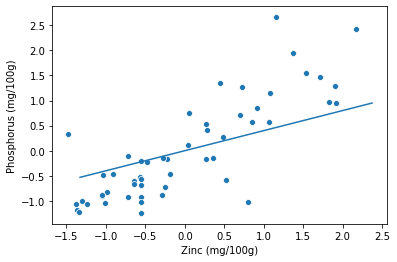

In [31]:
x_line = np.arange(data_norm['Zinc (mg/100g)'].min() - data_norm['Zinc (mg/100g)'].min() / 10,
                   data_norm['Zinc (mg/100g)'].max() + data_norm['Zinc (mg/100g)'].max() / 10,
                  0.1)
y_line = a + b * x_line

sns.scatterplot('Zinc (mg/100g)','Phosphorus (mg/100g)', data=data_norm)
plt.plot(x_line, y_line)

In [34]:
import h5py

hf = h5py.File('data_exercises.h5', 'w')

hf.create_dataset('cost_all_norm', data=cost_all_norm)
hf.close()